In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from keras.layers import Dense, Dropout, Flatten # core layers
from keras.layers import BatchNormalization
import tensorflow as tf

from tensorflow.keras.datasets import mnist

from keras.preprocessing.image import ImageDataGenerator

from keras.utils import to_categorical

In [2]:
 (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(f"Training data size is {train_images.shape}\nTesting data size is {test_images.shape}")

Training data size is (60000, 28, 28)
Testing data size is (10000, 28, 28)


In [4]:
# Normalization
train_images = train_images / 255.0
test_images = test_images / 255.0

In [5]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , channel = 1)
# channel = 1 => For gray scale
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

In [6]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print(f"Label size {train_labels.shape}")

Label size (60000, 10)


Data Visualization

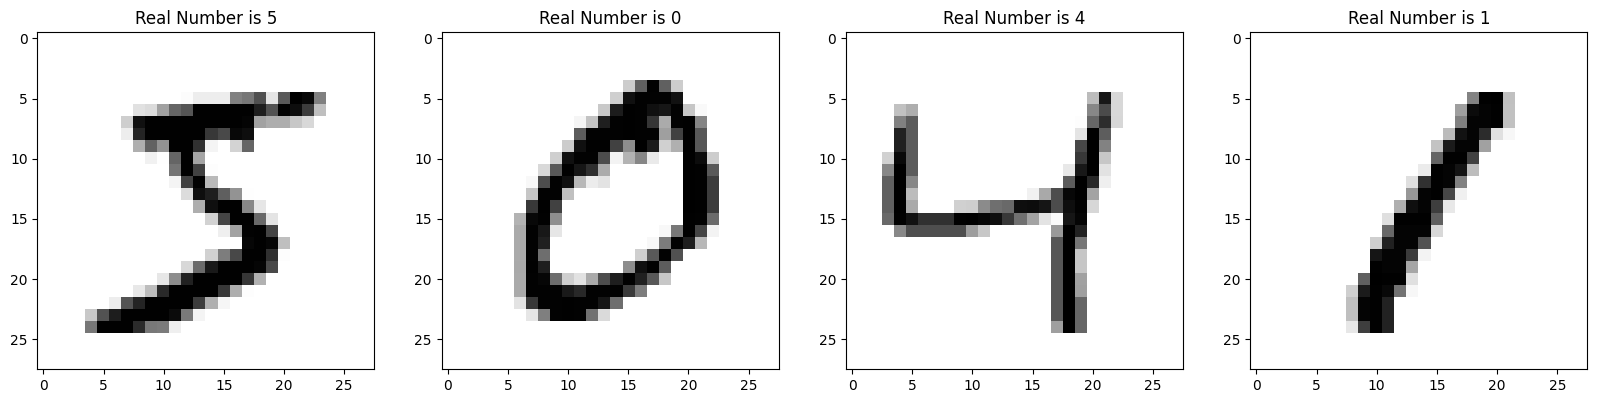

In [7]:
train_images__ = train_images.reshape(train_images.shape[0], 28, 28)

fig, axis = plt.subplots(1, 4, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(train_images__[i], cmap='binary')
    digit = train_labels[i].argmax()
    ax.set(title = f"Real Number is {digit}");

Normalization

In [8]:
mean = np.mean(train_images)
std = np.std(train_images)

def standardize(x):
    return (x-mean)/std

Model

In [10]:
model=Sequential()

model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512,activation="relu"))

model.add(Dense(10,activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 batch_normalization_3 (Bat  (None, 12, 12, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 128)        

In [14]:
epochs = 100
batch_size = 128
train_steps = train_images.shape[0] // batch_size
valid_steps = test_images.shape[0] // batch_size

es = keras.callbacks.EarlyStopping(
        monitor="val_acc", # metrics to monitor
        patience=10, # how many epochs before stop
        verbose=1,
        mode="max", # we need the maximum accuracy.
        restore_best_weights=True, #
     )

rp = keras.callbacks.ReduceLROnPlateau(
        monitor="val_acc",
        factor=0.2,
        patience=3,
        verbose=1,
        mode="max",
        min_lr=0.00001,
     )

In [17]:
# Fit the model
history = model.fit(train_images, train_labels, batch_size=batch_size, validation_split=0.2, epochs=100, callbacks=[es, rp])

Epoch 1/100
375/375 [==============================] - ETA: 0s - loss: 0.0811 - accuracy: 0.9747

375/375 [==============================] - 6s 17ms/step - loss: 0.0811 - accuracy: 0.9747 - val_loss: 1.1651 - val_accuracy: 0.6583 - lr: 0.0010
Epoch 2/100
371/375 [============================>.] - ETA: 0s - loss: 0.0353 - accuracy: 0.9890

375/375 [==============================] - 5s 13ms/step - loss: 0.0352 - accuracy: 0.9891 - val_loss: 0.0422 - val_accuracy: 0.9867 - lr: 0.0010
Epoch 3/100
375/375 [==============================] - ETA: 0s - loss: 0.0242 - accuracy: 0.9923

375/375 [==============================] - 5s 14ms/step - loss: 0.0242 - accuracy: 0.9923 - val_loss: 0.0628 - val_accuracy: 0.9829 - lr: 0.0010
Epoch 4/100
374/375 [============================>.] - ETA: 0s - loss: 0.0188 - accuracy: 0.9942

375/375 [==============================] - 5s 13ms/step - loss: 0.0188 - accuracy: 0.9942 - val_loss: 0.0418 - val_accuracy: 0.9893 - lr: 0.0010
Epoch 5/100
374/375 [============================>.] - ETA: 0s - loss: 0.0138 - accuracy: 0.9954

375/375 [==============================] - 5s 14ms/step - loss: 0.0139 - accuracy: 0.9954 - val_loss: 0.0437 - val_accuracy: 0.9894 - lr: 0.0010
Epoch 6/100
372/375 [============================>.] - ETA: 0s - loss: 0.0168 - accuracy: 0.9947

375/375 [==============================] - 5s 14ms/step - loss: 0.0168 - accuracy: 0.9948 - val_loss: 0.0402 - val_accuracy: 0.9899 - lr: 0.0010
Epoch 7/100
375/375 [==============================] - ETA: 0s - loss: 0.0143 - accuracy: 0.9952

375/375 [==============================] - 5s 14ms/step - loss: 0.0143 - accuracy: 0.9952 - val_loss: 0.0412 - val_accuracy: 0.9909 - lr: 0.0010
Epoch 8/100
373/375 [============================>.] - ETA: 0s - loss: 0.0118 - accuracy: 0.9964

375/375 [==============================] - 5s 14ms/step - loss: 0.0118 - accuracy: 0.9964 - val_loss: 0.0539 - val_accuracy: 0.9868 - lr: 0.0010
Epoch 9/100
372/375 [============================>.] - ETA: 0s - loss: 0.0120 - accuracy: 0.9960

375/375 [==============================] - 5s 14ms/step - loss: 0.0122 - accuracy: 0.9959 - val_loss: 0.0363 - val_accuracy: 0.9926 - lr: 0.0010
Epoch 10/100
373/375 [============================>.] - ETA: 0s - loss: 0.0086 - accuracy: 0.9974

375/375 [==============================] - 5s 14ms/step - loss: 0.0086 - accuracy: 0.9974 - val_loss: 0.0593 - val_accuracy: 0.9864 - lr: 0.0010
Epoch 11/100
375/375 [==============================] - ETA: 0s - loss: 0.0084 - accuracy: 0.9972

375/375 [==============================] - 5s 13ms/step - loss: 0.0084 - accuracy: 0.9972 - val_loss: 0.0343 - val_accuracy: 0.9908 - lr: 0.0010
Epoch 12/100
374/375 [============================>.] - ETA: 0s - loss: 0.0089 - accuracy: 0.9973

375/375 [==============================] - 5s 14ms/step - loss: 0.0090 - accuracy: 0.9973 - val_loss: 0.0605 - val_accuracy: 0.9878 - lr: 0.0010
Epoch 13/100
372/375 [============================>.] - ETA: 0s - loss: 0.0101 - accuracy: 0.9970

375/375 [==============================] - 5s 14ms/step - loss: 0.0102 - accuracy: 0.9969 - val_loss: 0.0496 - val_accuracy: 0.9898 - lr: 0.0010
Epoch 14/100
374/375 [============================>.] - ETA: 0s - loss: 0.0051 - accuracy: 0.9981

375/375 [==============================] - 5s 14ms/step - loss: 0.0051 - accuracy: 0.9981 - val_loss: 0.0412 - val_accuracy: 0.9916 - lr: 0.0010
Epoch 15/100
374/375 [============================>.] - ETA: 0s - loss: 0.0066 - accuracy: 0.9980

375/375 [==============================] - 5s 15ms/step - loss: 0.0067 - accuracy: 0.9980 - val_loss: 0.0553 - val_accuracy: 0.9887 - lr: 0.0010
Epoch 16/100
375/375 [==============================] - ETA: 0s - loss: 0.0098 - accuracy: 0.9972

375/375 [==============================] - 5s 14ms/step - loss: 0.0098 - accuracy: 0.9972 - val_loss: 0.0588 - val_accuracy: 0.9902 - lr: 0.0010
Epoch 17/100
374/375 [============================>.] - ETA: 0s - loss: 0.0068 - accuracy: 0.9977

375/375 [==============================] - 5s 15ms/step - loss: 0.0069 - accuracy: 0.9976 - val_loss: 0.0571 - val_accuracy: 0.9887 - lr: 0.0010
Epoch 18/100
374/375 [============================>.] - ETA: 0s - loss: 0.0062 - accuracy: 0.9980

375/375 [==============================] - 5s 14ms/step - loss: 0.0062 - accuracy: 0.9980 - val_loss: 0.0518 - val_accuracy: 0.9910 - lr: 0.0010
Epoch 19/100
374/375 [============================>.] - ETA: 0s - loss: 0.0081 - accuracy: 0.9977

375/375 [==============================] - 5s 14ms/step - loss: 0.0082 - accuracy: 0.9977 - val_loss: 0.0455 - val_accuracy: 0.9907 - lr: 0.0010
Epoch 20/100
373/375 [============================>.] - ETA: 0s - loss: 0.0054 - accuracy: 0.9985

375/375 [==============================] - 5s 14ms/step - loss: 0.0054 - accuracy: 0.9985 - val_loss: 0.0449 - val_accuracy: 0.9934 - lr: 0.0010
Epoch 21/100
375/375 [==============================] - ETA: 0s - loss: 0.0039 - accuracy: 0.9989

375/375 [==============================] - 5s 14ms/step - loss: 0.0039 - accuracy: 0.9989 - val_loss: 0.0543 - val_accuracy: 0.9918 - lr: 0.0010
Epoch 22/100
373/375 [============================>.] - ETA: 0s - loss: 0.0055 - accuracy: 0.9982

375/375 [==============================] - 5s 14ms/step - loss: 0.0054 - accuracy: 0.9982 - val_loss: 0.0462 - val_accuracy: 0.9921 - lr: 0.0010
Epoch 23/100
371/375 [============================>.] - ETA: 0s - loss: 0.0081 - accuracy: 0.9976

375/375 [==============================] - 5s 13ms/step - loss: 0.0080 - accuracy: 0.9977 - val_loss: 0.0489 - val_accuracy: 0.9922 - lr: 0.0010
Epoch 24/100
373/375 [============================>.] - ETA: 0s - loss: 0.0065 - accuracy: 0.9981

375/375 [==============================] - 5s 14ms/step - loss: 0.0065 - accuracy: 0.9981 - val_loss: 0.0529 - val_accuracy: 0.9912 - lr: 0.0010
Epoch 25/100
375/375 [==============================] - ETA: 0s - loss: 0.0032 - accuracy: 0.9989

375/375 [==============================] - 5s 14ms/step - loss: 0.0032 - accuracy: 0.9989 - val_loss: 0.0373 - val_accuracy: 0.9925 - lr: 0.0010
Epoch 26/100
372/375 [============================>.] - ETA: 0s - loss: 0.0022 - accuracy: 0.9992

375/375 [==============================] - 5s 14ms/step - loss: 0.0022 - accuracy: 0.9992 - val_loss: 0.0440 - val_accuracy: 0.9933 - lr: 0.0010
Epoch 27/100
372/375 [============================>.] - ETA: 0s - loss: 0.0032 - accuracy: 0.9992

375/375 [==============================] - 5s 15ms/step - loss: 0.0031 - accuracy: 0.9992 - val_loss: 0.0393 - val_accuracy: 0.9933 - lr: 0.0010
Epoch 28/100
374/375 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9997

375/375 [==============================] - 5s 14ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.0445 - val_accuracy: 0.9938 - lr: 0.0010
Epoch 29/100
375/375 [==============================] - ETA: 0s - loss: 0.0055 - accuracy: 0.9985

375/375 [==============================] - 5s 14ms/step - loss: 0.0055 - accuracy: 0.9985 - val_loss: 0.0689 - val_accuracy: 0.9900 - lr: 0.0010
Epoch 30/100
373/375 [============================>.] - ETA: 0s - loss: 0.0073 - accuracy: 0.9979

375/375 [==============================] - 5s 14ms/step - loss: 0.0072 - accuracy: 0.9979 - val_loss: 0.0494 - val_accuracy: 0.9936 - lr: 0.0010
Epoch 31/100
372/375 [============================>.] - ETA: 0s - loss: 0.0029 - accuracy: 0.9991

375/375 [==============================] - 5s 14ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.0447 - val_accuracy: 0.9919 - lr: 0.0010
Epoch 32/100
372/375 [============================>.] - ETA: 0s - loss: 0.0028 - accuracy: 0.9992

375/375 [==============================] - 5s 13ms/step - loss: 0.0028 - accuracy: 0.9992 - val_loss: 0.0606 - val_accuracy: 0.9930 - lr: 0.0010
Epoch 33/100
371/375 [============================>.] - ETA: 0s - loss: 0.0020 - accuracy: 0.9993

375/375 [==============================] - 5s 14ms/step - loss: 0.0020 - accuracy: 0.9993 - val_loss: 0.0499 - val_accuracy: 0.9917 - lr: 0.0010
Epoch 34/100
371/375 [============================>.] - ETA: 0s - loss: 0.0062 - accuracy: 0.9983

375/375 [==============================] - 5s 14ms/step - loss: 0.0062 - accuracy: 0.9983 - val_loss: 0.0389 - val_accuracy: 0.9945 - lr: 0.0010
Epoch 35/100
374/375 [============================>.] - ETA: 0s - loss: 0.0031 - accuracy: 0.9991

375/375 [==============================] - 5s 14ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.0569 - val_accuracy: 0.9922 - lr: 0.0010
Epoch 36/100
371/375 [============================>.] - ETA: 0s - loss: 0.0030 - accuracy: 0.9991

375/375 [==============================] - 5s 14ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.0586 - val_accuracy: 0.9914 - lr: 0.0010
Epoch 37/100
372/375 [============================>.] - ETA: 0s - loss: 0.0052 - accuracy: 0.9983

375/375 [==============================] - 5s 13ms/step - loss: 0.0052 - accuracy: 0.9983 - val_loss: 0.0712 - val_accuracy: 0.9917 - lr: 0.0010
Epoch 38/100
374/375 [============================>.] - ETA: 0s - loss: 0.0055 - accuracy: 0.9984

375/375 [==============================] - 5s 14ms/step - loss: 0.0055 - accuracy: 0.9984 - val_loss: 0.0496 - val_accuracy: 0.9922 - lr: 0.0010
Epoch 39/100
373/375 [============================>.] - ETA: 0s - loss: 0.0018 - accuracy: 0.9995

375/375 [==============================] - 5s 14ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0493 - val_accuracy: 0.9924 - lr: 0.0010
Epoch 40/100
373/375 [============================>.] - ETA: 0s - loss: 0.0023 - accuracy: 0.9994

375/375 [==============================] - 5s 13ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0609 - val_accuracy: 0.9912 - lr: 0.0010
Epoch 41/100
374/375 [============================>.] - ETA: 0s - loss: 0.0033 - accuracy: 0.9991

375/375 [==============================] - 5s 14ms/step - loss: 0.0033 - accuracy: 0.9991 - val_loss: 0.0535 - val_accuracy: 0.9923 - lr: 0.0010
Epoch 42/100
374/375 [============================>.] - ETA: 0s - loss: 0.0031 - accuracy: 0.9991

375/375 [==============================] - 5s 14ms/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.0511 - val_accuracy: 0.9934 - lr: 0.0010
Epoch 43/100
375/375 [==============================] - ETA: 0s - loss: 0.0028 - accuracy: 0.9992

375/375 [==============================] - 5s 14ms/step - loss: 0.0028 - accuracy: 0.9992 - val_loss: 0.0505 - val_accuracy: 0.9920 - lr: 0.0010
Epoch 44/100
371/375 [============================>.] - ETA: 0s - loss: 0.0026 - accuracy: 0.9994

375/375 [==============================] - 5s 13ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0469 - val_accuracy: 0.9935 - lr: 0.0010
Epoch 45/100
374/375 [============================>.] - ETA: 0s - loss: 0.0044 - accuracy: 0.9988

375/375 [==============================] - 5s 14ms/step - loss: 0.0043 - accuracy: 0.9988 - val_loss: 0.0525 - val_accuracy: 0.9926 - lr: 0.0010
Epoch 46/100
375/375 [==============================] - ETA: 0s - loss: 0.0023 - accuracy: 0.9992

375/375 [==============================] - 5s 13ms/step - loss: 0.0023 - accuracy: 0.9992 - val_loss: 0.0518 - val_accuracy: 0.9931 - lr: 0.0010
Epoch 47/100
374/375 [============================>.] - ETA: 0s - loss: 0.0015 - accuracy: 0.9996

375/375 [==============================] - 5s 14ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0598 - val_accuracy: 0.9932 - lr: 0.0010
Epoch 48/100
373/375 [============================>.] - ETA: 0s - loss: 0.0013 - accuracy: 0.9996

375/375 [==============================] - 5s 14ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0739 - val_accuracy: 0.9913 - lr: 0.0010
Epoch 49/100
371/375 [============================>.] - ETA: 0s - loss: 0.0030 - accuracy: 0.9991

375/375 [==============================] - 5s 14ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.0722 - val_accuracy: 0.9911 - lr: 0.0010
Epoch 50/100
373/375 [============================>.] - ETA: 0s - loss: 0.0034 - accuracy: 0.9990

375/375 [==============================] - 5s 14ms/step - loss: 0.0034 - accuracy: 0.9990 - val_loss: 0.0505 - val_accuracy: 0.9929 - lr: 0.0010
Epoch 51/100
373/375 [============================>.] - ETA: 0s - loss: 0.0015 - accuracy: 0.9996

375/375 [==============================] - 5s 14ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0443 - val_accuracy: 0.9927 - lr: 0.0010
Epoch 52/100
372/375 [============================>.] - ETA: 0s - loss: 9.1483e-04 - accuracy: 0.9997

375/375 [==============================] - 5s 14ms/step - loss: 9.2103e-04 - accuracy: 0.9997 - val_loss: 0.0651 - val_accuracy: 0.9919 - lr: 0.0010
Epoch 53/100
372/375 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997

375/375 [==============================] - 5s 14ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0746 - val_accuracy: 0.9911 - lr: 0.0010
Epoch 54/100
374/375 [============================>.] - ETA: 0s - loss: 0.0025 - accuracy: 0.9993

375/375 [==============================] - 5s 13ms/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0557 - val_accuracy: 0.9933 - lr: 0.0010
Epoch 55/100
371/375 [============================>.] - ETA: 0s - loss: 0.0032 - accuracy: 0.9990

375/375 [==============================] - 5s 14ms/step - loss: 0.0032 - accuracy: 0.9990 - val_loss: 0.0571 - val_accuracy: 0.9921 - lr: 0.0010
Epoch 56/100
374/375 [============================>.] - ETA: 0s - loss: 9.9861e-04 - accuracy: 0.9996

375/375 [==============================] - 5s 14ms/step - loss: 9.9595e-04 - accuracy: 0.9996 - val_loss: 0.0592 - val_accuracy: 0.9925 - lr: 0.0010
Epoch 57/100
375/375 [==============================] - ETA: 0s - loss: 0.0040 - accuracy: 0.9991

375/375 [==============================] - 5s 14ms/step - loss: 0.0040 - accuracy: 0.9991 - val_loss: 0.0667 - val_accuracy: 0.9923 - lr: 0.0010
Epoch 58/100
374/375 [============================>.] - ETA: 0s - loss: 0.0027 - accuracy: 0.9994

375/375 [==============================] - 5s 14ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0565 - val_accuracy: 0.9921 - lr: 0.0010
Epoch 59/100
374/375 [============================>.] - ETA: 0s - loss: 0.0025 - accuracy: 0.9996

375/375 [==============================] - 5s 13ms/step - loss: 0.0024 - accuracy: 0.9996 - val_loss: 0.0510 - val_accuracy: 0.9924 - lr: 0.0010
Epoch 60/100
375/375 [==============================] - ETA: 0s - loss: 7.7820e-04 - accuracy: 0.9998

375/375 [==============================] - 5s 14ms/step - loss: 7.7820e-04 - accuracy: 0.9998 - val_loss: 0.0491 - val_accuracy: 0.9935 - lr: 0.0010
Epoch 61/100
375/375 [==============================] - ETA: 0s - loss: 8.1094e-04 - accuracy: 0.9997

375/375 [==============================] - 5s 13ms/step - loss: 8.1094e-04 - accuracy: 0.9997 - val_loss: 0.0501 - val_accuracy: 0.9937 - lr: 0.0010
Epoch 62/100
374/375 [============================>.] - ETA: 0s - loss: 0.0028 - accuracy: 0.9994

375/375 [==============================] - 5s 14ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0492 - val_accuracy: 0.9935 - lr: 0.0010
Epoch 63/100
371/375 [============================>.] - ETA: 0s - loss: 4.0112e-04 - accuracy: 0.9999

375/375 [==============================] - 5s 14ms/step - loss: 3.9698e-04 - accuracy: 0.9999 - val_loss: 0.0453 - val_accuracy: 0.9941 - lr: 0.0010
Epoch 64/100
373/375 [============================>.] - ETA: 0s - loss: 5.8976e-05 - accuracy: 1.0000

375/375 [==============================] - 5s 14ms/step - loss: 5.8717e-05 - accuracy: 1.0000 - val_loss: 0.0510 - val_accuracy: 0.9943 - lr: 0.0010
Epoch 65/100
372/375 [============================>.] - ETA: 0s - loss: 5.5621e-05 - accuracy: 1.0000

375/375 [==============================] - 5s 14ms/step - loss: 5.5550e-05 - accuracy: 1.0000 - val_loss: 0.0429 - val_accuracy: 0.9947 - lr: 0.0010
Epoch 66/100
375/375 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 0.9995

375/375 [==============================] - 5s 13ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0867 - val_accuracy: 0.9915 - lr: 0.0010
Epoch 67/100
373/375 [============================>.] - ETA: 0s - loss: 0.0063 - accuracy: 0.9986

375/375 [==============================] - 5s 14ms/step - loss: 0.0063 - accuracy: 0.9985 - val_loss: 0.0600 - val_accuracy: 0.9927 - lr: 0.0010
Epoch 68/100
372/375 [============================>.] - ETA: 0s - loss: 0.0047 - accuracy: 0.9988

375/375 [==============================] - 5s 14ms/step - loss: 0.0047 - accuracy: 0.9989 - val_loss: 0.0594 - val_accuracy: 0.9925 - lr: 0.0010
Epoch 69/100
372/375 [============================>.] - ETA: 0s - loss: 5.8760e-04 - accuracy: 0.9997

375/375 [==============================] - 5s 14ms/step - loss: 5.8296e-04 - accuracy: 0.9998 - val_loss: 0.0563 - val_accuracy: 0.9941 - lr: 0.0010
Epoch 70/100
371/375 [============================>.] - ETA: 0s - loss: 2.8947e-04 - accuracy: 0.9999

375/375 [==============================] - 5s 13ms/step - loss: 2.8688e-04 - accuracy: 0.9999 - val_loss: 0.0564 - val_accuracy: 0.9942 - lr: 0.0010
Epoch 71/100
375/375 [==============================] - ETA: 0s - loss: 8.4326e-05 - accuracy: 1.0000

375/375 [==============================] - 5s 14ms/step - loss: 8.4326e-05 - accuracy: 1.0000 - val_loss: 0.0539 - val_accuracy: 0.9935 - lr: 0.0010
Epoch 72/100
372/375 [============================>.] - ETA: 0s - loss: 7.7728e-05 - accuracy: 1.0000

375/375 [==============================] - 5s 14ms/step - loss: 7.7113e-05 - accuracy: 1.0000 - val_loss: 0.0582 - val_accuracy: 0.9927 - lr: 0.0010
Epoch 73/100
375/375 [==============================] - ETA: 0s - loss: 0.0029 - accuracy: 0.9993

375/375 [==============================] - 5s 14ms/step - loss: 0.0029 - accuracy: 0.9993 - val_loss: 0.0907 - val_accuracy: 0.9905 - lr: 0.0010
Epoch 74/100
375/375 [==============================] - ETA: 0s - loss: 0.0058 - accuracy: 0.9989

375/375 [==============================] - 5s 15ms/step - loss: 0.0058 - accuracy: 0.9989 - val_loss: 0.0626 - val_accuracy: 0.9921 - lr: 0.0010
Epoch 75/100
375/375 [==============================] - ETA: 0s - loss: 0.0024 - accuracy: 0.9995

375/375 [==============================] - 5s 14ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0646 - val_accuracy: 0.9925 - lr: 0.0010
Epoch 76/100
375/375 [==============================] - ETA: 0s - loss: 7.9623e-04 - accuracy: 0.9998

375/375 [==============================] - 5s 14ms/step - loss: 7.9623e-04 - accuracy: 0.9998 - val_loss: 0.0603 - val_accuracy: 0.9939 - lr: 0.0010
Epoch 77/100
371/375 [============================>.] - ETA: 0s - loss: 4.6575e-04 - accuracy: 0.9999

375/375 [==============================] - 5s 14ms/step - loss: 4.6085e-04 - accuracy: 0.9999 - val_loss: 0.0638 - val_accuracy: 0.9920 - lr: 0.0010
Epoch 78/100
372/375 [============================>.] - ETA: 0s - loss: 2.0379e-04 - accuracy: 1.0000

375/375 [==============================] - 5s 14ms/step - loss: 2.0219e-04 - accuracy: 1.0000 - val_loss: 0.0543 - val_accuracy: 0.9935 - lr: 0.0010
Epoch 79/100
372/375 [============================>.] - ETA: 0s - loss: 3.6799e-05 - accuracy: 1.0000

375/375 [==============================] - 5s 14ms/step - loss: 3.6552e-05 - accuracy: 1.0000 - val_loss: 0.0526 - val_accuracy: 0.9939 - lr: 0.0010
Epoch 80/100
373/375 [============================>.] - ETA: 0s - loss: 9.7965e-06 - accuracy: 1.0000

375/375 [==============================] - 5s 14ms/step - loss: 9.7444e-06 - accuracy: 1.0000 - val_loss: 0.0513 - val_accuracy: 0.9945 - lr: 0.0010
Epoch 81/100
372/375 [============================>.] - ETA: 0s - loss: 2.1475e-05 - accuracy: 1.0000

375/375 [==============================] - 5s 14ms/step - loss: 2.1660e-05 - accuracy: 1.0000 - val_loss: 0.0538 - val_accuracy: 0.9943 - lr: 0.0010
Epoch 82/100
372/375 [============================>.] - ETA: 0s - loss: 7.6794e-06 - accuracy: 1.0000

375/375 [==============================] - 5s 14ms/step - loss: 7.6217e-06 - accuracy: 1.0000 - val_loss: 0.0538 - val_accuracy: 0.9944 - lr: 0.0010
Epoch 83/100
375/375 [==============================] - ETA: 0s - loss: 7.3517e-06 - accuracy: 1.0000

375/375 [==============================] - 5s 14ms/step - loss: 7.3517e-06 - accuracy: 1.0000 - val_loss: 0.0531 - val_accuracy: 0.9946 - lr: 0.0010
Epoch 84/100
372/375 [============================>.] - ETA: 0s - loss: 0.0040 - accuracy: 0.9994

375/375 [==============================] - 5s 14ms/step - loss: 0.0052 - accuracy: 0.9994 - val_loss: 0.0959 - val_accuracy: 0.9876 - lr: 0.0010
Epoch 85/100
375/375 [==============================] - ETA: 0s - loss: 0.0084 - accuracy: 0.9980

375/375 [==============================] - 5s 14ms/step - loss: 0.0084 - accuracy: 0.9980 - val_loss: 0.0498 - val_accuracy: 0.9928 - lr: 0.0010
Epoch 86/100
372/375 [============================>.] - ETA: 0s - loss: 0.0024 - accuracy: 0.9994

375/375 [==============================] - 5s 14ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0528 - val_accuracy: 0.9942 - lr: 0.0010
Epoch 87/100
372/375 [============================>.] - ETA: 0s - loss: 5.8968e-04 - accuracy: 0.9998

375/375 [==============================] - 5s 13ms/step - loss: 5.8514e-04 - accuracy: 0.9998 - val_loss: 0.0436 - val_accuracy: 0.9943 - lr: 0.0010
Epoch 88/100
371/375 [============================>.] - ETA: 0s - loss: 3.9278e-04 - accuracy: 0.9999

375/375 [==============================] - 5s 14ms/step - loss: 3.9543e-04 - accuracy: 0.9999 - val_loss: 0.0599 - val_accuracy: 0.9923 - lr: 0.0010
Epoch 89/100
372/375 [============================>.] - ETA: 0s - loss: 9.1790e-04 - accuracy: 0.9997

375/375 [==============================] - 5s 14ms/step - loss: 9.1057e-04 - accuracy: 0.9998 - val_loss: 0.0424 - val_accuracy: 0.9950 - lr: 0.0010
Epoch 90/100
374/375 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998

375/375 [==============================] - 6s 15ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.0633 - val_accuracy: 0.9934 - lr: 0.0010
Epoch 91/100
371/375 [============================>.] - ETA: 0s - loss: 5.2545e-04 - accuracy: 0.9998

375/375 [==============================] - 5s 14ms/step - loss: 5.1986e-04 - accuracy: 0.9998 - val_loss: 0.0499 - val_accuracy: 0.9943 - lr: 0.0010
Epoch 92/100
371/375 [============================>.] - ETA: 0s - loss: 0.0026 - accuracy: 0.9996

375/375 [==============================] - 6s 15ms/step - loss: 0.0027 - accuracy: 0.9995 - val_loss: 0.0635 - val_accuracy: 0.9920 - lr: 0.0010
Epoch 93/100
373/375 [============================>.] - ETA: 0s - loss: 0.0028 - accuracy: 0.9994

375/375 [==============================] - 5s 14ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0675 - val_accuracy: 0.9927 - lr: 0.0010
Epoch 94/100
374/375 [============================>.] - ETA: 0s - loss: 0.0028 - accuracy: 0.9994

375/375 [==============================] - 5s 14ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0593 - val_accuracy: 0.9932 - lr: 0.0010
Epoch 95/100
372/375 [============================>.] - ETA: 0s - loss: 0.0023 - accuracy: 0.9996

375/375 [==============================] - 5s 14ms/step - loss: 0.0023 - accuracy: 0.9996 - val_loss: 0.0561 - val_accuracy: 0.9942 - lr: 0.0010
Epoch 96/100
373/375 [============================>.] - ETA: 0s - loss: 3.5288e-04 - accuracy: 0.9999

375/375 [==============================] - 5s 13ms/step - loss: 3.5108e-04 - accuracy: 0.9999 - val_loss: 0.0548 - val_accuracy: 0.9939 - lr: 0.0010
Epoch 97/100
375/375 [==============================] - ETA: 0s - loss: 2.0970e-04 - accuracy: 0.9999

375/375 [==============================] - 5s 14ms/step - loss: 2.0970e-04 - accuracy: 0.9999 - val_loss: 0.0560 - val_accuracy: 0.9939 - lr: 0.0010
Epoch 98/100
375/375 [==============================] - ETA: 0s - loss: 2.3019e-04 - accuracy: 0.9999

375/375 [==============================] - 5s 13ms/step - loss: 2.3019e-04 - accuracy: 0.9999 - val_loss: 0.0606 - val_accuracy: 0.9934 - lr: 0.0010
Epoch 99/100
375/375 [==============================] - ETA: 0s - loss: 4.7029e-04 - accuracy: 0.9998

375/375 [==============================] - 5s 14ms/step - loss: 4.7029e-04 - accuracy: 0.9998 - val_loss: 0.0571 - val_accuracy: 0.9939 - lr: 0.0010
Epoch 100/100
373/375 [============================>.] - ETA: 0s - loss: 0.0033 - accuracy: 0.9994

375/375 [==============================] - 5s 14ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0637 - val_accuracy: 0.9933 - lr: 0.0010


In [19]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy {test_acc}\nTest loss {test_loss}")

313/313 - 1s - loss: 0.0417 - accuracy: 0.9940 - 1s/epoch - 4ms/step
Test accuracy 0.9940000176429749
Test loss 0.041692741215229034


Training and validation curves

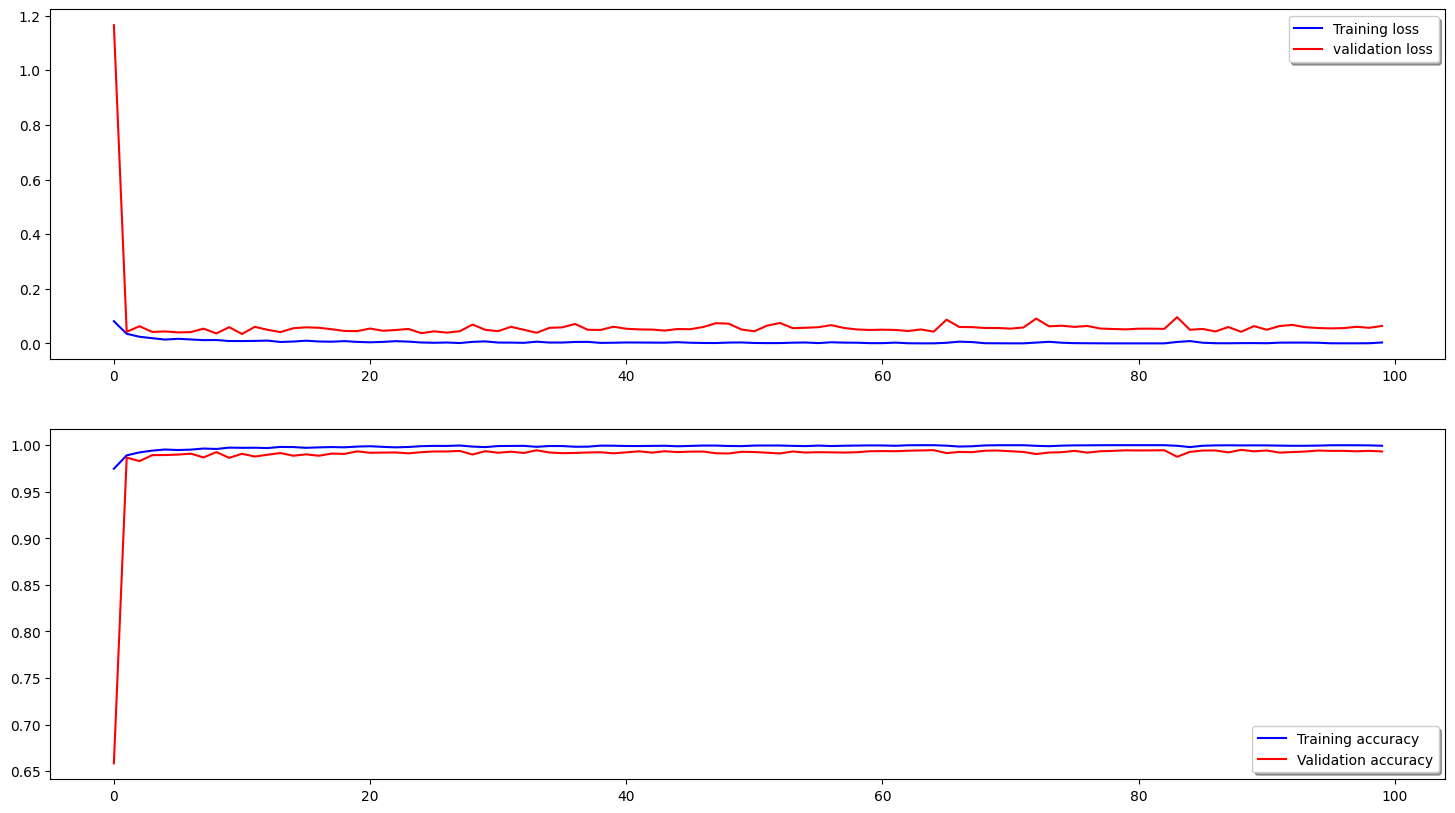

In [22]:
# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

Vizualize Feature Maps

In [23]:
# Getting names of layers of CNN
layer_names = [layer.name for layer in model.layers]
layer_names

['conv2d_5',
 'conv2d_6',
 'max_pooling2d_3',
 'batch_normalization_3',
 'conv2d_7',
 'conv2d_8',
 'max_pooling2d_4',
 'batch_normalization_4',
 'conv2d_9',
 'max_pooling2d_5',
 'batch_normalization_5',
 'flatten_1',
 'dense_2',
 'dense_3']

In [24]:
# Getting output of the layers of CNN
layer_outputs = [layer.output for layer in model.layers]

In [25]:
# Feature maps visualization Model from CNN Layers
feature_map_model = tf.keras.Model(inputs=model.input, outputs=layer_outputs)

In [ ]:
# lets feed the input image into the model created
feature_maps = feature_map_model.predict(test_images)

313/313 [==============================] - 1s 3ms/step
